In [ ]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [ ]:
# 2.Set Connecion

#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

consumer_key = "PykNKbumwmbB6iJcwfwLsGhHf"
consumer_secret = "RW5eXvMFQGTtinoipkpjTMNow3zPa8k4j3ZGM7sFTRqaMOHRxr"
access_token = "1369738466267779072-6H3Uf3KUTdBtcYWiC03iRXaazP1OAe"
access_token_secret = "CTnv9tePzyAlQqqB5L6qOooTaM6hHoJ7o8F3N3O5XT4Lu"



# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [ ]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [ ]:
# We will use api as api.search inside this tweepy cursor.

In [ ]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        #df.to_csv("My Drive\SNA\Trial\data.csv")
        #df.to_csv( "/SNA/trial/df.csv", index=False, encoding='utf-8-sig')
        
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

In [ ]:
#trying out-------mounting to drive
#from google.colab import drive
#drive.mount('drive')

In [ ]:
#Saving the file in CSV format in drive
#df.to_csv('data1.csv')
#!cp data.csv "drive/My Drive/SNA/trial"

In [ ]:
# Import Drive API and authenticate.
from google.colab import drive


In [ ]:
# Mount your Drive to the Colab VM.
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


The following creates a new csv file storing the data 


In [ ]:
# Write the DataFrame to CSV file.>>>>>>>>DATA DOESNT EXPORT AFTER THE FIRST TRY
with open('/gdrive/My Drive/SNA/trial/d4.csv', 'w') as f:
  df.to_csv(f)

In [ ]:
df = pd.DataFrame(x)
df.to_excel('filename.xlsx', sheet_name = 'New_sheet')

NameError: ignored

In [ ]:
from google.colab import files
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic=["Football"]
get_tweets(Topic , Count=100)

In [ ]:
df.head(100)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-03-29 17:16:13,Margaret Kavanagh,True,"'It's a parent's worst nightmare,' Norfolk Chr...",0,0,"Norfolk, VA"
1,2021-03-29 17:16:13,Leo🦇,False,@irealkamran @Parin_156 Nah he was probably a ...,0,0,
2,2021-03-29 17:16:11,saswata nath,False,@IndianFootball Indian football team pl learn ...,0,0,
3,2021-03-29 17:16:11,Gox,False,"@FussballHussain Yeah, Lewa has turned into a ...",0,0,
4,2021-03-29 17:16:10,Jae5 - Dimension OUT NOW!,False,Football is back tonight. I can cry.,0,0,
...,...,...,...,...,...,...,...
95,2021-03-29 17:15:00,rohini,False,india football team lost 6-0 💔\n🇮🇳❤️ heads up ...,5,0,
96,2021-03-29 17:15:00,Hotoro oreki (Last seen Long Time Ago),False,@IndianFootball Do you even care about Indian ...,1,0,
97,2021-03-29 17:15:00,Aston Villa News,True,"Oh Andy, oh Andy, you're the greatest, the Hol...",3,0,Birmingham
98,2021-03-29 17:15:00,The Chronicle,True,The warnings that Steve Bruce and #NUFC have i...,0,0,Newcastle upon Tyne


In [ ]:
Topic=["WWE"]
get_tweets(Topic , Count=100)

In [ ]:
df.head(100)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-03-29 17:16:24,Bennett 🏴‍☠️,False,@swagex_ @IamArenas @finnicksfitz @RheaRipley_...,0,0,
1,2021-03-29 17:16:23,Ronin Zero 🤖🦁,False,@WWE @FOXSports @TherealRVD Well deserved,0,0,"Lion's Den aka Pomona, Cali"
2,2021-03-29 17:16:22,PWStream,False,RVD Reveals How He Found Out About WWE Hall Of...,0,0,United States
3,2021-03-29 17:16:21,👹👹,False,OMG THIS MF BE SPITTING FACTS BEEN SAYING THAT...,0,0,
4,2021-03-29 17:16:21,Shaun,False,"@BellasflairK2 And also, when your talking abo...",0,0,Little Rock
...,...,...,...,...,...,...,...
95,2021-03-29 17:12:16,janie,False,@AEW @Christian4Peeps @FrankieKazarian @tntdra...,3,0,"Austin, Texas"
96,2021-03-29 17:12:09,~Ttuck~,False,So WWE post these polls on YouTube about which...,0,0,"Kentucky, USA"
97,2021-03-29 17:12:07,@easyworldnews,False,Rob Van Dam Reveals Who Called Him About Hall ...,0,1,Global
98,2021-03-29 17:12:06,@easyworldnews,False,Andrade To Give First Post-WWE Interview Tonig...,0,1,Global


In [ ]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [ ]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new

In [ ]:
# Call function to get Clean tweets

df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2021-03-29 17:16:24,Bennett 🏴‍☠️,False,@swagex_ @IamArenas @finnicksfitz @RheaRipley_...,0,0,,wwe for telling the truth
1,2021-03-29 17:16:23,Ronin Zero 🤖🦁,False,@WWE @FOXSports @TherealRVD Well deserved,0,0,"Lion's Den aka Pomona, Cali",well deserved
2,2021-03-29 17:16:22,PWStream,False,RVD Reveals How He Found Out About WWE Hall Of...,0,0,United States,rvd reveals how he found out about wwe hall of...
3,2021-03-29 17:16:21,👹👹,False,OMG THIS MF BE SPITTING FACTS BEEN SAYING THAT...,0,0,,omg this mf be spitting facts been saying that...
4,2021-03-29 17:16:21,Shaun,False,"@BellasflairK2 And also, when your talking abo...",0,0,Little Rock,and also when your talking about the greatest ...


In [ ]:
# Call function to get the Sentiments

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2021-03-29 17:16:24,Bennett 🏴‍☠️,False,@swagex_ @IamArenas @finnicksfitz @RheaRipley_...,0,0,,wwe for telling the truth,Neutral
1,2021-03-29 17:16:23,Ronin Zero 🤖🦁,False,@WWE @FOXSports @TherealRVD Well deserved,0,0,"Lion's Den aka Pomona, Cali",well deserved,Neutral
2,2021-03-29 17:16:22,PWStream,False,RVD Reveals How He Found Out About WWE Hall Of...,0,0,United States,rvd reveals how he found out about wwe hall of...,Neutral
3,2021-03-29 17:16:21,👹👹,False,OMG THIS MF BE SPITTING FACTS BEEN SAYING THAT...,0,0,,omg this mf be spitting facts been saying that...,Neutral
4,2021-03-29 17:16:21,Shaun,False,"@BellasflairK2 And also, when your talking abo...",0,0,Little Rock,and also when your talking about the greatest ...,Positive


In [ ]:
# Check Summary of Random Record
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 Rob Van Dam? “Mr. Monday Night?” The Whole Fricken Show??? #WWE #HOF

Clean tweet:
 rob van dam mr monday night the whole fricken show wwe hof

Sentiment of the tweet:
 Positive


In [ ]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['WWE'] are : 101
Total Positive Tweets are : 46
Total Negative Tweets are : 10
Total Neutral Tweets are : 45


In [ ]:
df["Sentiment"].value_counts()

Positive    46
Neutral     45
Negative    10
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

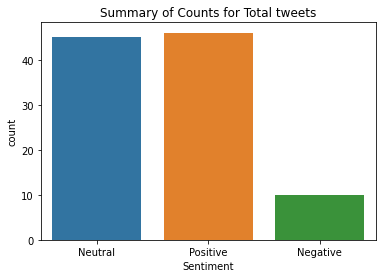

In [ ]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

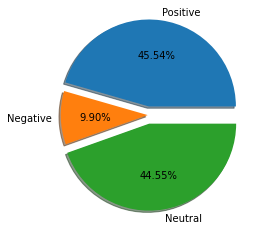

In [ ]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

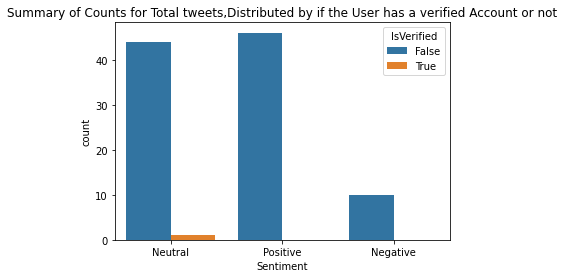

In [ ]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")